In [278]:
# importing required packages
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import calendar

warnings.filterwarnings('ignore')

In [2]:
# reading dataset from csv file and storing in df variable
df = pd.read_csv('loan.csv')
# checking the header data
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# checking the number of records in the dataset
df.shape

(39717, 111)

In [4]:
# Settings the number of rows to display in output to few all column data
# got below code from "https://stackoverflow.com/questions/58298963/jupyter-not-showing-whole-output" url
pd.set_option('display.max_rows', 200)

In [5]:
# checking the datatypes of the columns in the dataset
df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

# Datatype Conversions

_Converting the columns data with relevant data type {e.g. converting string date to date format}_

In [6]:
# ID of the customer is not a numeric value to perform some operation, but a unique value to identify the customer
# So, converting id column to String type
df.id = df.id.astype(str)
df.id.describe()

count      39717
unique     39717
top       617318
freq           1
Name: id, dtype: object

In [7]:
# Member ID of the customer is not a numeric value to perform some operation, but a unique value to identify the customer membership
# So, converting member id column to String type

df.member_id = df.member_id.astype(str)
df.member_id.describe()

count      39717
unique     39717
top       970799
freq           1
Name: member_id, dtype: object

In [8]:
# Term in the dataset is available as object, where term is a interger value of number of months the loan period
# replacing the "months" with empty string and converting it to int
df.term = df.term.apply(lambda x: int(x.replace('months', '').strip()))
df.term.describe()

count    39717.000000
mean        42.418007
std         10.622815
min         36.000000
25%         36.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: term, dtype: float64

In [9]:
# Interest Rate on the loan is a numeric value and only contains percentage symbol in addition with the interest rate
# by removing "%" from the interest rate column, we can convert it into numberic column [float type]
df.int_rate = df.int_rate.apply(lambda x: float(x.replace('%', '').strip()))
df.int_rate.describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [10]:
# converting issue_d i.e. The month which the loan was funded column type to date format
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')
df.issue_d.describe()

count                   39717
unique                     55
top       2011-12-01 00:00:00
freq                     2260
first     2007-06-01 00:00:00
last      2011-12-01 00:00:00
Name: issue_d, dtype: object

In [11]:
# converting earliest_cr_line i.e. The month the borrower's earliest reported credit line was opened column type to date format
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line, format='%b-%y')
df.earliest_cr_line.describe()

count                   39717
unique                    526
top       1998-11-01 00:00:00
freq                      370
first     1969-02-01 00:00:00
last      2068-12-01 00:00:00
Name: earliest_cr_line, dtype: object

In [12]:
#  converting revol_util i.e. Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit  column to float type by removing "%"
df.revol_util = df.revol_util.apply(lambda x: float(str(x).replace('%', '').strip()))
df.revol_util.describe()

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

In [13]:
# converting last_pymnt_d column to date type column
df.last_pymnt_d = pd.to_datetime(df.last_pymnt_d, format='%b-%y')
df.last_pymnt_d.describe()

count                   39646
unique                    101
top       2016-05-01 00:00:00
freq                     1256
first     2008-01-01 00:00:00
last      2016-05-01 00:00:00
Name: last_pymnt_d, dtype: object

In [14]:
# converting next_pymnt_d column to date type column
df.next_pymnt_d = pd.to_datetime(df.next_pymnt_d, format='%b-%y')
df.next_pymnt_d.describe()

count                    1140
unique                      2
top       2016-06-01 00:00:00
freq                     1125
first     2016-06-01 00:00:00
last      2016-07-01 00:00:00
Name: next_pymnt_d, dtype: object

In [15]:
# converting last_credit_pull_d column to date type column
df.last_credit_pull_d = pd.to_datetime(df.last_credit_pull_d, format='%b-%y')
df.last_credit_pull_d.describe()

count                   39715
unique                    106
top       2016-05-01 00:00:00
freq                    10308
first     2007-05-01 00:00:00
last      2016-05-01 00:00:00
Name: last_credit_pull_d, dtype: object

# Checkers

In [16]:
# As per Data Dictionary, id of a customer should be unique
df.id.is_unique

True

In [17]:
# As per Data Dictionary, member id of a customer should be unique
df.member_id.is_unique

True

In [18]:
# checking that funded amount should be less than or equals to applied loan amount, by using the opposite condition output rows are zero
df[df.funded_amnt > df.loan_amnt].shape

(0, 111)

In [19]:
# checking that funded amount should be greater than or equals to funded amount by investor, and this is being tested by using the opposite condition where output rows should be zero
df[df.funded_amnt<df.funded_amnt_inv].shape

(0, 111)

In [20]:
# Term of the loan should be either 36 months or 60 months
# So, checking the unique values in the term column by grouping the same

df.term.groupby(by=df.term).describe()

,count,mean,std,min,25%,50%,75%,max
term,,,,,,,,
36,29096.0,36.0,0.0,36.0,36.0,36.0,36.0,36.0
60,10621.0,60.0,0.0,60.0,60.0,60.0,60.0,60.0


In [21]:
df.int_rate.groupby(by=[df.grade, df.sub_grade, df.term]).describe()

count       mean       std    min      25%     50%  \
grade sub_grade term                                                        
A     A1        36    1139.0   5.805224  0.469727   5.42   5.4200   5.420   
      A2        36    1494.0   6.381653  0.574339   5.79   5.7900   6.305   
                60      14.0   6.067143  0.454743   5.79   5.7900   5.790   
      A3        36    1769.0   7.182120  0.515136   6.17   6.9900   7.140   
                60      41.0   6.406585  0.421726   6.17   6.1700   6.170   
      A4        36    2753.0   7.681133  0.649123   6.00   7.4900   7.510   
                60     133.0   7.239850  0.522826   6.54   6.5400   7.490   
      A5        36    2495.0   8.302365  0.737729   6.91   7.8800   8.490   
                60     247.0   7.909069  0.664500   6.91   7.6600   7.880   
B     B1        36    1619.0  10.027906  0.597094   6.00   9.8800   9.910   
                60     211.0   9.818673  0.512384   8.88   9.6300   9.910   
      B2        36    1724.0  10.495626  0.583990   6.00  10.2500  10.590   
                60     333.0  10.456456  0.418822   9.25  10.5900  10.650   
      B3        36    2195.0  11.024050  0.636782   6.00  10.6200  10.990   
                60     722.0  10.898518  0.647035   9.62  10.3700  10.990   
      B4        36    1819.0  11.441715  0.742029   9.64  10.9900  11.490   
                60     693.0  11.325296  0.754956   9.99  10.7400  11.490   
      B5        36    1974.0  11.783642  0.739154   6.00  11.3600  11.990   
                60     730.0  11.785466  0.703462  10.36  11.1100  11.860   
C     C1        36    1470.0  12.770735  0.649075  10.28  12.6800  12.870   
                60     666.0  13.031321  0.365396  12.23  12.6800  12.990   
      C2        36    1341.0  13.262990  0.703406  10.59  13.0600  13.220   
                60     670.0  13.531806  0.577995   6.00  13.1100  13.490   
      C3        36    1092.0  13.550769  0.751846  10.91  13.1600  13.570   
                60     437.0  13.928238  0.476240  12.98  13.4300  13.980   
      C4        36     954.0  13.929612  0.918261   6.00  13.4700  13.850   
                60     282.0  14.459255  0.715074  13.35  13.8000  14.790   
      C5        36     892.0  14.357635  1.018350   6.00  13.7900  14.260   
                60     294.0  14.934014  0.838575  13.72  14.1700  15.230   
D     D1        36     918.0  14.843007  1.020472   6.00  14.5400  14.610   
                60      13.0  15.570769  0.800765  14.54  14.5900  15.620   
      D2        36     816.0  15.185723  0.996643  12.17  14.9100  14.960   
                60     532.0  15.600508  0.883387   6.00  14.9100  15.210   
      D3        36     637.0  15.492480  1.009369  12.49  15.2800  15.330   
                60     536.0  16.111213  0.859198  14.83  15.2800  16.490   
      D4        36     494.0  15.825688  1.073832  12.80  15.2000  15.700   
                60     487.0  16.507084  0.839664  15.20  15.6500  16.890   
      D5        36     366.0  16.223306  1.065282  13.12  16.0000  16.020   
                60     508.0  16.943504  1.086384   6.00  16.0200  17.490   
E     E1        36     286.0  16.511503  1.093350  13.43  15.9500  16.400   
                60     477.0  17.320629  1.027651  15.95  16.4000  16.450   
      E2        36     211.0  16.808673  1.246084  13.75  16.0000  16.770   
                60     445.0  17.745978  1.026407  16.32  16.7700  18.390   
      E3        36     164.0  17.247073  1.192693  14.07  16.3200  17.140   
                60     389.0  17.999820  1.369287   6.00  17.1400  17.190   
      E4        36     108.0  17.347500  1.800540   6.00  16.6300  17.510   
                60     346.0  18.558931  1.105878  17.06  17.5225  19.290   
      E5        36      99.0  17.722727  1.146122  14.67  17.1900  17.880   
                60     317.0  19.018770  1.328380   6.00  17.8800  19.690   
F     F1        36      62.0  18.159839  1.384666  15.01  17.2600  18.170   
                60 

In [22]:
df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

# Data cleaning
_fixing the issues in the column data_

In [23]:
# Home ownership should be Mortage, Own, Rent and Other
df.home_ownership.value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [24]:
# In home ownership column we have None for home ownership, which shouldn't be there
# As there is no specific factor to determine the home ownership
pd.set_option('display.max_columns', 200)
df[df.home_ownership=='NONE']

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39318,231321,214993,10000,10000,1228.06,36,7.75,312.22,A,A3,ups,5 years,NONE,22200.0,Not Verified,2008-01-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,"I plan to pay off my credit cards, leaving me ...",debt_consolidation,Melinda Holster,233xx,VA,5.24,0,1994-04-01,0,0.0,0.0,9,0,4767,8.7,22,f,0.0,0.0,11239.620890,1380.00,9999.99,1239.63,0.0,0.0,0.0,2011-02-01,313.59,NaT,2011-01-01,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
39659,121568,121574,4000,4000,1925.00,36,9.64,128.41,B,B4,NaN,< 1 year,NONE,100000.0,Not Verified,2007-08-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,I took a high interest loan from Citibank in 2...,other,Refinancing high interest loan,950xx,CA,15.00,0,1999-05-01,1,NaN,NaN,6,0,8155,14.9,8,f,0.0,0.0,4622.489229,2224.58,4000.00,622.49,0.0,0.0,0.0,2010-09-01,129.76,NaT,2007-08-01,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39660,121535,121373,2800,2800,1625.00,36,8.70,88.65,B,B1,NaN,< 1 year,NONE,120000.0,Not Verified,2007-08-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The family is expanding in October and we are ...,other,Baby is coming,024xx,MA,15.00,0,1999-05-01,1,NaN,NaN,6,0,8155,14.9,8,f,0.0,0.0,3191.218575,1852.05,2800.00,391.22,0.0,0.0,0.0,2010-09-01,89.80,NaT,2007-08-01,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# checking the Mode value of Home Ownership column as it's an categorical type
df.home_ownership.mode()[0]

'RENT'

In [26]:
# So, replacing None with RENT
df.home_ownership = df.home_ownership.apply(lambda x: "RENT" if x == "NONE" else x)

# again checking the home ownership column 
df.home_ownership.value_counts()

RENT        18902
MORTGAGE    17659
OWN          3058
OTHER          98
Name: home_ownership, dtype: int64

In [27]:
df.verification_status.value_counts(dropna=False)

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

In [28]:
df.loan_status.value_counts(dropna=False)

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

# Handling Missing values

### Removing empty columns

In [29]:
# checking number of empty cells in a column
df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [30]:
# There are total of 39717 records in the dataset
# if we abserved above data which consist of number of null values in a column
# we can see that some of the columns are completely empty, which are not usable for analysis, so dropping the column
df = df.dropna(axis=1, how='all')
df.shape

(39717, 57)

In [31]:
# dropping columns with huge missing records
df = df.drop(axis=1, columns=['next_pymnt_d', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'])
df.shape

(39717, 54)

### Checking single value column in the dataset which are not usable in Analysis

In [296]:
# checking number of unique records in pymnt_plan column
df.pymnt_plan.value_counts(dropna=False)

AttributeError: 'DataFrame' object has no attribute 'pymnt_plan'

In [33]:
# checking number of unique records in initial_list_status column
df.initial_list_status.value_counts(dropna=False)

f    39717
Name: initial_list_status, dtype: int64

In [34]:
# checking number of unique records in collections_12_mths_ex_med column
df.collections_12_mths_ex_med.value_counts(dropna=False)

0.0    39661
NaN       56
Name: collections_12_mths_ex_med, dtype: int64

In [35]:
# checking number of unique records in policy_code column
df.policy_code.value_counts(dropna=False)

1    39717
Name: policy_code, dtype: int64

In [36]:
# checking number of unique records in acc_now_delinq column
df.acc_now_delinq.value_counts(dropna=False)

0    39717
Name: acc_now_delinq, dtype: int64

In [37]:
# checking number of unique records in chargeoff_within_12_mths column
df.chargeoff_within_12_mths.value_counts(dropna=False)

0.0    39661
NaN       56
Name: chargeoff_within_12_mths, dtype: int64

In [38]:
# checking number of unique records in delinq_amnt column
df.delinq_amnt.value_counts(dropna=False)

0    39717
Name: delinq_amnt, dtype: int64

In [39]:
# checking number of unique records in tax_liens column
df.tax_liens.value_counts(dropna=False)

0.0    39678
NaN       39
Name: tax_liens, dtype: int64

In [40]:
# checking number of unique records in application_type column
df.application_type.value_counts(dropna=False)

INDIVIDUAL    39717
Name: application_type, dtype: int64

In [41]:
# Dropping all the columns which has single value in it
df = df.drop(axis=1, columns=['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 
                              'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'application_type'])
df.shape

(39717, 45)

In [42]:
# Checking URL column
df.url.describe()

count                                                 39717
unique                                                39717
top       https://lendingclub.com/browse/loanDetail.acti...
freq                                                      1
Name: url, dtype: object

We can observe that all the values in url column is unique and doesn't contain any additional information apart from the customer id <br>
So, dropping unwanted information from the dataset to better understanding of data

In [43]:
# dropping url column
df = df.drop(axis=1, columns=['url'])
df.shape

(39717, 44)

In [301]:
# checking the null values in each column
df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
desc                       0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_in

In [45]:
# checking emp_title column
df.emp_title.describe()

count       37258
unique      28820
top       US Army
freq          134
Name: emp_title, dtype: object

In [298]:
df.emp_title.value_counts()

Others                          2145
US Army                          117
Bank of America                  103
US Air Force                      51
AT&T                              50
                                ... 
RGIS Inventory Specialists         1
Car Sense                          1
Central Texas Medical Center       1
Associate Press                    1
MasTec Advanced Technologies       1
Name: emp_title, Length: 26322, dtype: int64

In [46]:
# there are no clear dominate values/ frequent values in the emp_title column, so imputing with new value here
# Filling missing emp_title as Others
df.emp_title = df.emp_title.fillna("Others")
df.emp_title.isnull().sum()

0

In [47]:
# chekcing emp_length column
df.emp_length.value_counts(dropna=False)

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
NaN          1075
Name: emp_length, dtype: int64

In [48]:
# As emp_lenght is a categorical column, taking MODE of the column to fill the null records
df.emp_length.mode()[0]

'10+ years'

In [49]:
# Filling the null records with 10+ years value
df.emp_length = df.emp_length.fillna(df.emp_length.mode()[0])
# checking the value counts for confirmation
df.emp_length.value_counts(dropna=False)

10+ years    9954
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [50]:
# in desc column there 12940, this is near 1/3rd of records
# so, imputing new value to the column as Others
df.desc = df.desc.fillna("Others")
df.desc.isnull().sum()

0

In [51]:
# checking title column data
df.title.value_counts()

Debt Consolidation                   2184
Debt Consolidation Loan              1729
Personal Loan                         659
Consolidation                         517
debt consolidation                    505
                                     ... 
Financing a motorcycle                  1
No More Outrageous Rates                1
matt's consolidation and business       1
53 CC Debt Consolidation Loan           1
2006 Kia Sedona                         1
Name: title, Length: 19615, dtype: int64

* By abserving above title column value, there seems to be same value but different case and spelling differ

* So, we can replace other values with Dept Consolidation in title column

In [299]:
# updating the existing value using lambda function
df.title = df.title.apply(lambda x: 'Debt Consolidation' if str(x).lower().find('Consolid')!= -1 else x)
# checking the title column again
df.title.describe()

count                  35665
unique                 17972
top       Debt Consolidation
freq                    1902
Name: title, dtype: object

In [300]:
# Getting the Mode value of title column
df.title.mode()[0]

'Debt Consolidation'

In [54]:
# filling null value with Debt Consolidation as the Mode value of the same column
df.title = df.title.fillna(df.title.mode()[0])
# Checking null values in the title columnm
df.title.isnull().sum()

0

In [55]:
# Number of public record bankruptcies field is an affective field for analysis
df.pub_rec_bankruptcies.value_counts(dropna=False)

0.0    37339
1.0     1674
NaN      697
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [56]:
# imputing the null values in pub_rec_bankruptcies column with 0.0 as it has 95% records
df.pub_rec_bankruptcies = df.pub_rec_bankruptcies.fillna(0.0)
df.pub_rec_bankruptcies.value_counts(dropna=False)

0.0    38036
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

> There are 50 missing values in revol_util column <br>
> as revol_util is a numeric type, so considering the median value to fill the missing records


In [57]:
# checking the median of the revol_util column
round(df.revol_util.median())

49

In [58]:
# imputing the median in missing value
df.revol_util = df.revol_util.fillna(df.revol_util.median())
# checking the missing value count in revol_util columm
df.revol_util.isnull().sum()

0

In [59]:
# Checcking the last pymnt month
df[~df.last_pymnt_d.isnull()].last_pymnt_d.apply(lambda x: calendar.month_name[int(x.month)]).value_counts()

May          4285
March        3761
December     3512
October      3271
August       3242
July         3226
February     3211
April        3204
January      3041
September    3015
November     2945
June         2933
Name: last_pymnt_d, dtype: int64

> as we can see, all the values are near similar

In [60]:
# checking the loan status when the last_pymnt_d column value is null
df[df.last_pymnt_d.isnull()].loan_status.value_counts()

Charged Off    71
Name: loan_status, dtype: int64

> As we can see all the customers with missing last_pymt_d are defaulters <br>
> So, imputing missing value here might be an effect as well as dropping also might loss of data <br>
> converting type from date to string and introducing LastPay_NA to replace missing value

In [61]:
# Converting the last_pymnt_d column to string by extracting the month from the date and replacing in the same 
# as well imputing null values with new value in it
df.last_pymnt_d = df.last_pymnt_d.apply(lambda x: calendar.month_name[int(x.month)] if pd.notna(x) else 'LastPay_NA' )

In [62]:
# checking last credit pull d column
df.last_credit_pull_d.describe()

count                   39715
unique                    106
top       2016-05-01 00:00:00
freq                    10308
first     2007-05-01 00:00:00
last      2016-05-01 00:00:00
Name: last_credit_pull_d, dtype: object

> As we can see that 2016-05-01 is repeated 10308 times in last_credit_pull_d column, which is 1/3 of total records <br>
> there are only 2 records missing in the same column <br> 
> so, imputing the value at missing values

In [63]:
# imputing the null value in last_credit_pull_d column with most common value in it
df.last_credit_pull_d = df.last_credit_pull_d.fillna('2016-05-01 00:00:00')
df.last_credit_pull_d.isnull().sum()

0

In [64]:
# checking the missing values again
df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
desc                       0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_in

In [65]:
# checking number of records
df.shape

(39717, 44)

In [66]:
# checking column type again
df.dtypes

id                                 object
member_id                          object
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                                int64
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                        object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                         object
dti                               float64
delinq_2yrs                       

# Checking the outliers

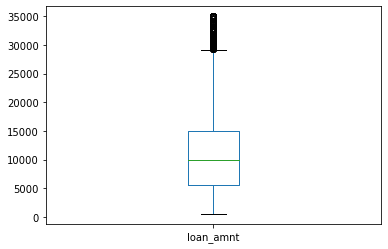

In [67]:
# plotting box plot to check the outliers
df.loan_amnt.plot.box()
plt.show()

In [68]:
# getting quantile and IQR values
q3 = df.loan_amnt.quantile(.75)
q1 = df.loan_amnt.quantile(.25)
iqr = q3-q1
low = q1-1.5*iqr
high = q3+1.5*iqr

# printing lower and uppter outlier value
print(f"lower inner outlier {low}")
print(f'upper inner outlier {high}')

lower inner fence -8750.0
upper inner fence 29250.0


> as we can see the lower inner fence is a negative value <br>
> So, we can ignore the lower fence outliers <br>
> lets check the upper fence outliers

In [69]:
# checking number of records in outside the upper fence
df[df.loan_amnt>high].shape

(1230, 44)

In [70]:
# checking the loan status of the loan-amnt column outliers
df[df.loan_amnt>high].loan_status.value_counts()

Fully Paid     843
Charged Off    253
Current        134
Name: loan_status, dtype: int64

> As we can see there are 1230 records as outliers and has a mixed type of loan status <br>
> so, dropping these values for better analysis

In [71]:
# dropping the loan_amnt column outliers
df = df[df.loan_amnt<=high]
# checking the number of records again
df.shape

(38487, 44)

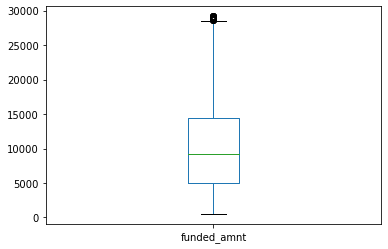

In [72]:
# checking the outliers in funded amnt with box plot
df.funded_amnt.plot.box()
plt.show()

> there are outliers in funded_amnt column <br>
> lets look into the lower and upper fence

In [73]:
# getting outliers for funded amnt column
q3 = df.funded_amnt.quantile(.75)
q1 = df.funded_amnt.quantile(.25)
iqr = q3-q1
low = q1-1.5*iqr
high = q3+1.5*iqr

print(f"lower inner fence {low}")
print(f'upper inner fence {high}')

lower inner fence -9100.0
upper inner fence 28500.0


In [74]:
# dropping these outlier and checking the record count
df = df[df.funded_amnt<=high]
df.shape

(38453, 44)

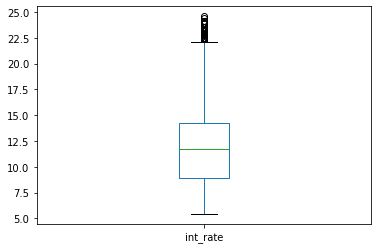

In [75]:
# checking int-rate column outlier
df.int_rate.plot.box()
plt.show()

In [76]:
# checking int rate column
df.int_rate.describe()

count    38453.000000
mean        11.896110
std          3.645991
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.590000
Name: int_rate, dtype: float64

In [77]:
# checking 95th quantile of int rate column
df.int_rate.quantile(.95)

18.25

> as we see now, 95th percentile is 18.25 and maximum value is 24.59
> clearly there is a outlier

In [78]:
# getting outlier values
q3 = df.int_rate.quantile(.75)
q1 = df.int_rate.quantile(.25)
iqr = q3-q1
low = q1-1.5*iqr
high = q3+1.5*iqr

print(f"lower inner fence {low}")
print(f'upper inner fence {high}')

lower inner fence 0.9449999999999994
upper inner fence 22.265


In [79]:
# dropping outlier value
df = df[df.int_rate<=high]
df.shape

(38379, 44)

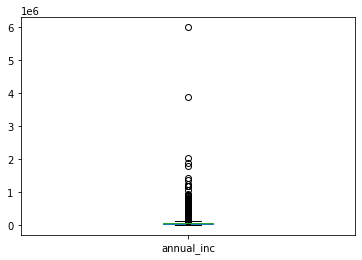

In [83]:
# plotting box plot for annual income to see the outlier
df.annual_inc.plot.box()
plt.show()

* by observing above boxplot of there are so many records after the upper fence

In [84]:
# finding the upper outlier
upper_fence = df.annual_inc.quantile(.75)+1.5*(df.annual_inc.quantile(.75)-df.annual_inc.quantile(.25))
upper_fence

138750.0

In [85]:
# checking number of records are outliers
df[df.annual_inc>upper_fence].shape

(1624, 44)

In [86]:
# dropping the outliers
df = df[df.annual_inc<=upper_fence]
# checking the number of records again
df.shape

(35665, 44)

> We have completed all the outliers in the dataset <br>
> Now we have 35665 records we can analyse

# Deriving Columns

Deriving the month and year from issue_d column

In [87]:
# deriving month as string
# df['issue_d_month'] = df.issue_d.apply(lambda x: calendar.month_name[int(x.month)])
df['issue_d_month'] = df.issue_d.apply(lambda x: int(x.month))
df.issue_d_month.describe()

count    35665.000000
mean         7.141259
std          3.398699
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: issue_d_month, dtype: float64

In [88]:
# deriving year as int
df['issue_d_year'] = df.issue_d.apply(lambda x: int(x.year))
df.issue_d_year.describe()

count    35665.000000
mean      2010.314734
std          0.880158
min       2007.000000
25%       2010.000000
50%       2011.000000
75%       2011.000000
max       2011.000000
Name: issue_d_year, dtype: float64

In [126]:
# deriving a column to hold salary range
df['salary_bucket'] = pd.qcut(df.annual_inc, [0, 0.2, 0.4, 0.6, 0.8, 1], ['VL_Salary','L_Salary','M_Salary', 'H_Salary', 'VH_Salary'])

In [127]:
# deriving a column to hold interest rate range
df['int_rate_bucket'] = pd.qcut(df.int_rate, [0, 0.2, 0.4, 0.6, 0.8, 1], ['VL_Int_Rate','L_Int_Rate','M_Int_Rate', 'H_Int_Rate', 'VH_Int_Rate'])

In [214]:
# deriving a column to loan amount range
df['loan_amnt_bucket'] = pd.qcut(df.loan_amnt, [0, 0.2, 0.4, 0.6, 0.8, 1], ['VL_loan_amnt','L_loan_amnt','M_loan_amnt', 'H_loan_amnt', 'VH_loan_amnt'])

In [215]:
# deriving a column to funded amount range
df['funded_amnt_bucket'] = pd.qcut(df.funded_amnt, [0, 0.2, 0.4, 0.6, 0.8, 1], ['VL_funded_amnt','L_funded_amnt','M_funded_amnt', 'H_funded_amnt', 'VH_funded_amnt'])

In [216]:
# deriving a column to hold funded amount investor range
df['funded_amnt_inv_bucket'] = pd.qcut(df.funded_amnt_inv, [0, 0.2, 0.4, 0.6, 0.8, 1], ['VL_funded_amnt_inv','L_funded_amnt_inv','M_funded_amnt_inv', 'H_funded_amnt_inv', 'VH_funded_amnt_inv'])

# Analysis

## Univariate Analysis

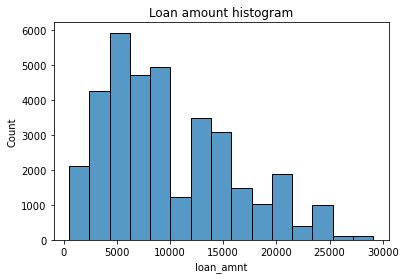

In [89]:
# plotting hist plot for loan amount
sns.histplot(data=df.loan_amnt, bins=15)
plt.title('Loan amount histogram')
plt.show()

As we can see the above histogram, that most of the loans are for 5000 & less proposals are for loan amount greater than 25000

We can also observe that there is a constant increase towards 5000 and from there there is a irregular decreament 

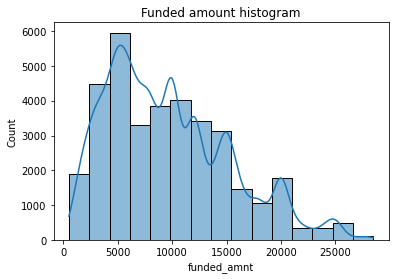

In [90]:
# plotting hist plot for funded amnt
sns.histplot(data=df.funded_amnt, bins=15, kde=True)
plt.title('Funded amount histogram')
plt.show()

we can observe that there is a constant increase of loans till 5000 and from there there is a decrease of number of loans (there are hikes, but still it's continue to decrease the number of loans)

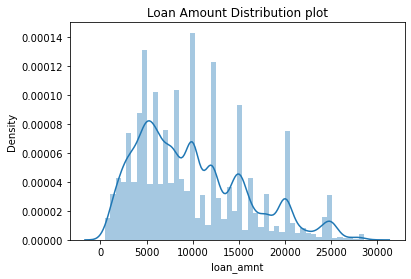

In [91]:
# ploting distplot for loan amount
sns.distplot(df.loan_amnt)
plt.title('Loan Amount Distribution plot')
plt.show()

Now we can in the dist plot, we can see similar behavior as previous

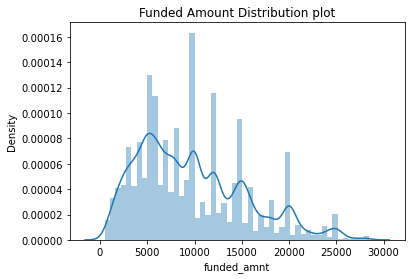

In [92]:
# distribution plot for funded amount
sns.distplot(df.funded_amnt)
plt.title('Funded Amount Distribution plot')
plt.show()

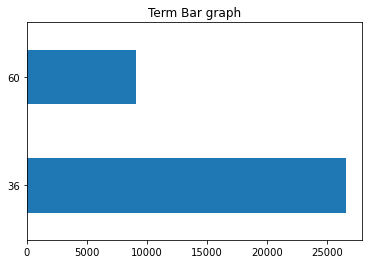

In [302]:
# bar graph for frequency of term
df.term.value_counts().plot.barh(x='freq of loans', y='term')
plt.title('Term Bar graph')
plt.show()

#### Observation
as we can see that most of the loans are with term 36, which as more than twice as 60 term loans

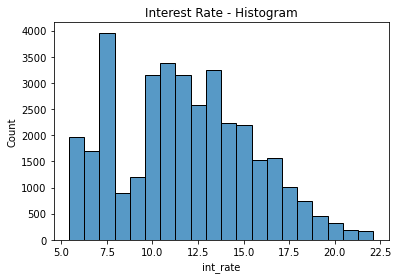

In [94]:
# histogram for interest rate
sns.histplot(data=df.int_rate, bins=20)
plt.title('Interest Rate - Histogram')
plt.show()

#### Observation
* From the above histogram, we can see that most of the loans are with 7.5 % interest loan
* Number of loans are started to decrease from interest rate 15

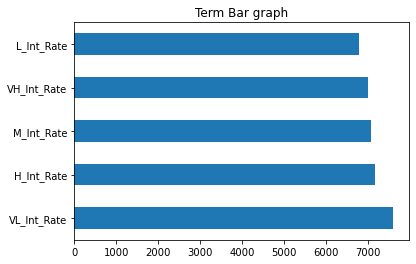

In [304]:
# Now lets plot for Interest rate bucket to see the loans spread by range
df.int_rate_bucket.value_counts().plot.barh(x='freq of loans', y='Interest Rate bucket')
plt.title('Interest Rate Bucket vs Frequency - Bar graph')
plt.show()

#### Observation
* Now we can see that number of loans spread across the interest range are approximately equal
* Very Low interest rate loan are have more loans in comparison

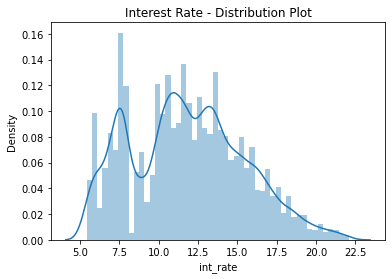

In [95]:
# plotting distribution plot for interest rate
sns.distplot(df.int_rate)
plt.title('Interest Rate - Distribution Plot')
plt.show()

#### Observation
We can see that density of the interest rate is more in between 10 and 15

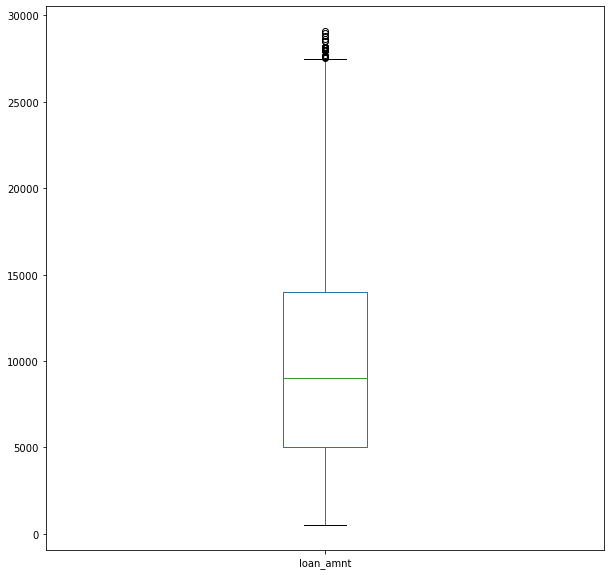

In [96]:
# plotting a box plot for loan amount column
plt.figure(figsize=[10,10])
df.loan_amnt.plot.box()
plt.show()

#### Observation
We can observe below points based on above box plot
* mean of the loan amount is near 10K
* There are some loans which are at outter fence
* Upper fence is around 25k
* lower fence is more than 0

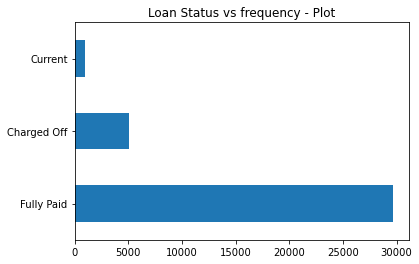

In [97]:
# Bar plot the Loan status
df.loan_status.value_counts().plot.barh()
plt.title('Loan Status vs frequency - Plot')
plt.show()

#### Observation
* We can see that 30k+ loans are fully paid, 5K+ loans are Charged Off and the current loans are very less compage to others

In [305]:
# now lets see the percentage of the loans based on status of the loan
fully_paid_percentage = round((df[df.loan_status=='Fully Paid'].shape[0]/df.shape[0])*100)
charged_off_percentage = round((df[df.loan_status=='Charged Off'].shape[0]/df.shape[0])*100)
current_percentage = round((df[df.loan_status=='Current'].shape[0]/df.shape[0])*100)

print(f'''
percentage of loans status as fully paid is {fully_paid_percentage} %
percentage of loans status as charged off is {charged_off_percentage} %
percentage of loans status as current is {current_percentage} %
''')


percentage of loans status as fully paid is 83 %
percentage of loans status as charged off is 14 %
percentage of loans status as current is 3 %



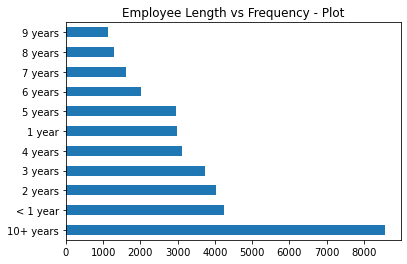

In [99]:
# Bar plot of Employment length
df.emp_length.value_counts().plot.barh()
plt.title('Employee Length vs Frequency - Plot')
plt.show()

#### Observe
* We can observe that Customer/Borrower with 10+ years of experiencehad more than 8K loans and it's double the number of loans compares to other records
* Except for 10+ years of experience customer, by experience increases number of customers taking loan is decrease (except for customer with 1 year experience)

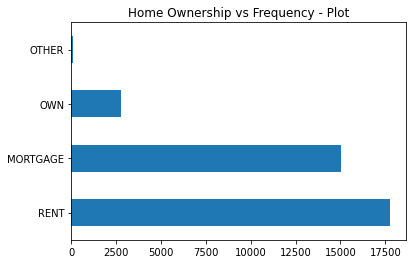

In [100]:
# Plotting bar plot for Home ownership
df.home_ownership.value_counts().plot.barh()
plt.title('Home Ownership vs Frequency - Plot')
plt.show()

#### Observation
* as we can see most of the customer are either in Rent or Mortgage
* only 2.5K+ customers are having own
* and very negligible number of customers home ownership is Other

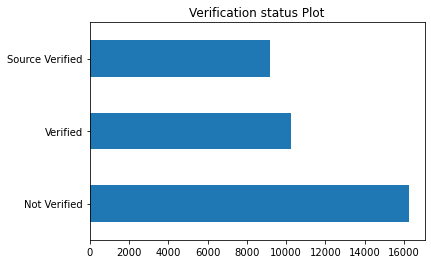

In [101]:
# Bar plot of Verification status column
df.verification_status.value_counts().plot.barh()
plt.title('Verification status Plot')
plt.show()

#### Observeration
* We can see most of the loan customers are Not verified compare indivually with Verified and Source Verified customer
* in total, verified customers (including both verified and source verified) are more than not verfied.
* Source Verified and Verified customers are approximately equal


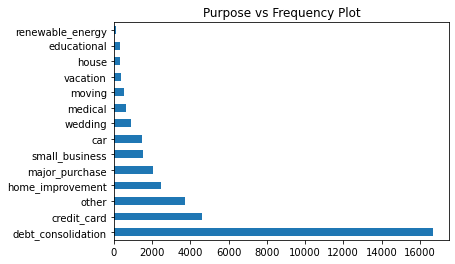

In [102]:
# bar plot the purpose of loan
df.purpose.value_counts().plot.barh()
plt.title('Purpose vs Frequency Plot')
plt.show()

#### Observation
* Most of the customers (nearly half of them) having debt consolidation for purpose of loan
* least amount of customers are for renewable energy

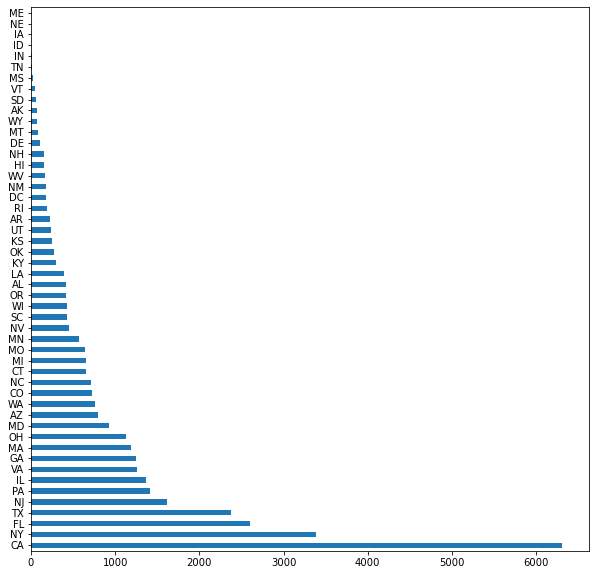

In [103]:
# bar plot the loan frequency by statewise
plt.figure(figsize=[10, 10])
df.addr_state.value_counts().plot.barh()
plt.show()

#### Observation
* We can observe that California state has more number of loans compare to other state, almost double the amount of loans
* 7 states(ME, NE, ID, IA, IN, TN & MS) are having very least loans 

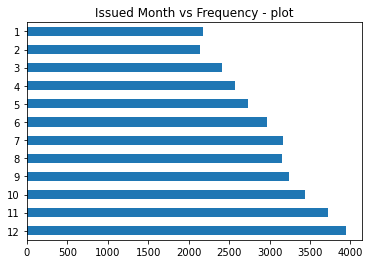

In [105]:
# bar plot for loan issued month
df.issue_d_month.value_counts().sort_index(ascending=False).plot.barh()
plt.title('Issued Month vs Frequency - plot')
plt.show()

#### Observation
We can observe that there is a constant increase in number of loans issued by every month

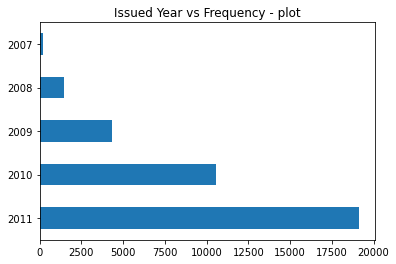

In [106]:
# bar plot for loan issued year
df.issue_d_year.value_counts().sort_index(ascending=False).plot.barh()
plt.title('Issued Year vs Frequency - plot')
plt.show()

#### Observation
We can clearly see that number of loans issued are icreased constantly (almost twice as previous year)

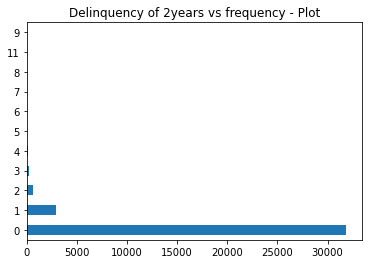

In [108]:
# Bar plot of Delinq_eyrs column
df.delinq_2yrs.value_counts().plot.barh()
plt.title('Delinquency of 2years vs frequency - Plot')
plt.show()

#### Observation
* We can see that 30K+ loans delinquency for past 2 years are 0
* Number of loans decreases by increase of delinquency for past 2 years
* when the delinquency value is more than 3, number of loans are negligible

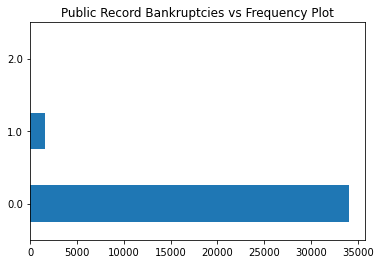

In [110]:
# bar plot for public record of bankruptcies
df.pub_rec_bankruptcies.value_counts().plot.barh()
plt.title('Public Record Bankruptcies vs Frequency Plot')
plt.show()

#### Observation
Above 90 % of the customers have Zero bankruptcies and very few customer has a single record of bankruptcy <br>
and almost negligible amount of customers have 2 records of bankruptcies

## Bivariate Analysis

Now lets see the relation of two columns

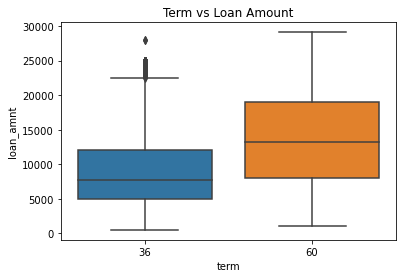

In [111]:
# box plot for term vs loan amount
sns.boxplot(x=df.term, y=df.loan_amnt)
plt.title('Term vs Loan Amount')
plt.show()

#### Observation
* By observing above chart, we can see that for 60 months term the mean, 25th quantile and 75th quantiel are higher compare to 36 month term loan
* 60 month 25th quantile to approximate to mean/50th quantile of 36 term loan
* 60 month loan mean is higher than 75th quantitle of 36 term loan
* 60 month loan upper fence is approximate to maximum loan amount for 36 term 
* Interquartile Range is more for 60 months term loan compare to 36 months loan

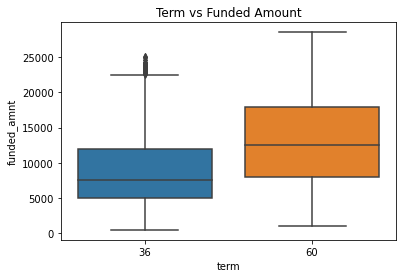

In [112]:
# box plot of term vs funded amount
sns.boxplot(x=df.term, y=df.funded_amnt)
plt.title('Term vs Funded Amount')
plt.show()

#### observation
* above plot is almost similar to term vs loan amount plot, except for the values for the upper fence

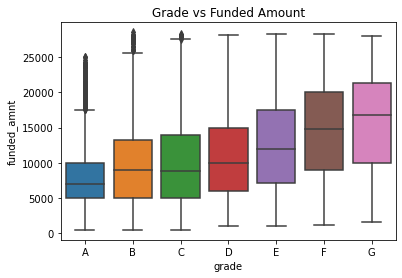

In [114]:
# box plot for grades vs funded amount
sns.boxplot(x=df.grade.sort_values(), y=df.funded_amnt)
plt.title('Grade vs Funded Amount')
plt.show()

#### Observation
* We can observe that for A, B & C grades 25th quantile is same and from D it's keep on increasing
* Mean for grades B & C is same and D is also approximately equals to B or C, and keeps on creasing by grade
* IQR (Interquartile Range) is also increasing by grade
* we can see that there are more loans beyond the upper fence of A and there are less funded amount records for B and rest of the grades doesn't show-up any record in upper fence

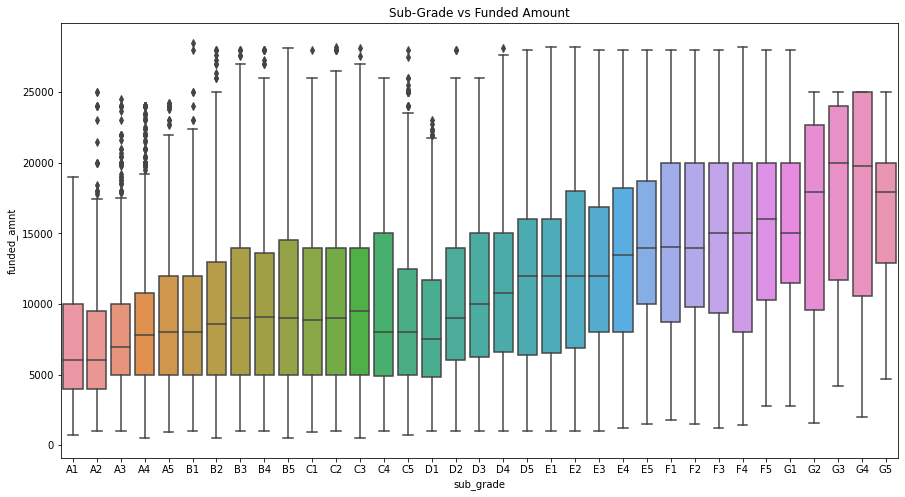

In [115]:
# box plot for sub grade vs funded amount
plt.figure(figsize=[15, 8])
sns.boxplot(x=df.sub_grade.sort_values(), y=df.funded_amnt)
plt.title('Sub-Grade vs Funded Amount')
plt.show()

#### Observation
* Basaed on the above plot, we can observer that mean, 25th and 75th percentitle is increase with some fluctuation 
* we can see A3 sub grade has low IQR, where G2 is high IQR
* As we saw previously till grade C, 25th quantile is approximately equals and keep on increasing by grade to right

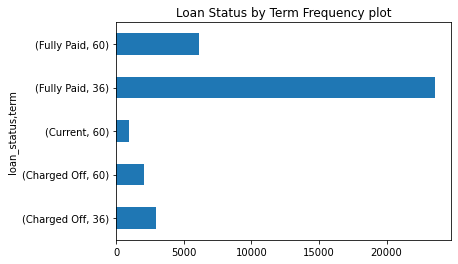

In [116]:
# bar graph for loan status vs term
df.groupby(['loan_status']).term.value_counts().plot.barh()
plt.title('Loan Status by Term Frequency plot')
plt.show()

In [117]:
# checking the fully paid loans with 36 months term loan
round((df[(df.loan_status=='Fully Paid') & (df.term==36)].shape[0]/df.shape[0])*100)

66

#### Observation
Here we observe couple of factors with loan payment
* 66 % of the loans are Fully paid and with are 36 month term loan
* There are no current loan with term period of 36

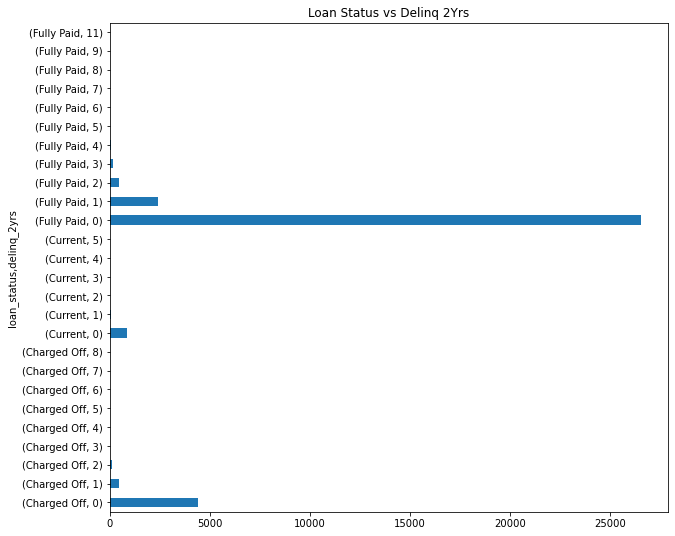

In [306]:
# bar plot for loan status vs delinq-2yrs
plt.figure(figsize=[10, 9])
df.groupby(['loan_status']).delinq_2yrs.value_counts().plot.barh()
plt.title('Loan Status vs Delinq 2Yrs')
plt.show()

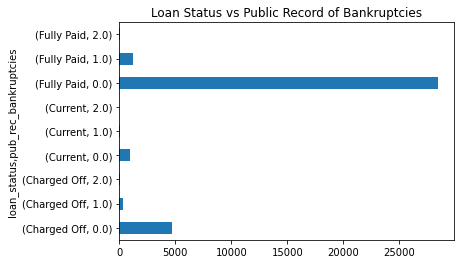

In [307]:
# Bar graph for loan status vs public rec bankruptcies
df.groupby(['loan_status']).pub_rec_bankruptcies.value_counts().plot.barh()
plt.title('Loan Status vs Public Record of Bankruptcies')
plt.show()

#### Observation
* We can see that very high number of loans are Fully paid and Zero public record bankruptcies
* similar to that defaulted loans also high when Zero public record bankruptcies

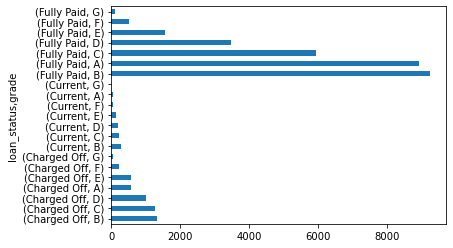

In [125]:
# df.plot.bar(x='loan_status', y=df.grade.value_counts(), stacked=True)
df.groupby(['loan_status']).grade.value_counts().plot.barh(stacked=True)
plt.show()

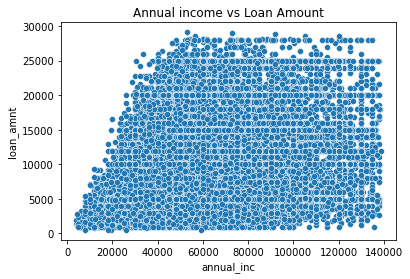

In [277]:
# Scatter plot for Annual income vs loan Amount
sns.scatterplot(x='annual_inc', y='loan_amnt', data=df)
plt.title('Annual income vs Loan Amount')
plt.show()

#### Observation
From the above plot we can see the higher loans are applied by the customers with 30k+ annual income <br> 
but this doesn't mean that higher salaried customers only applies for higher loan, these customers tends to apply from lower to higher loans

In [217]:
# creating pivot table for interest rate bucket vs Salary bucket vs loan status
res = pd.pivot_table(data=df, index='int_rate_bucket', columns="salary_bucket", values='loan_status', aggfunc=np.count_nonzero)
res

salary_bucket,VL_Salary,L_Salary,M_Salary,H_Salary,VH_Salary
int_rate_bucket,,,,,
VL_Int_Rate,1514,1378,1549,1634,1533
L_Int_Rate,1544,1351,1331,1252,1319
M_Int_Rate,1519,1375,1366,1446,1379
H_Int_Rate,1642,1384,1421,1350,1372
VH_Int_Rate,1268,1291,1510,1456,1481


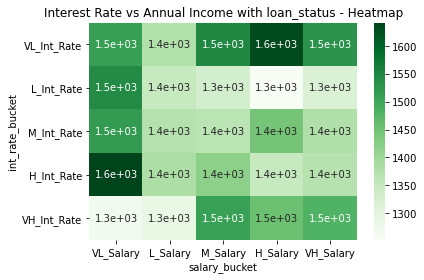

In [144]:
# creating heatmap for above pivot table to understand the relation between salary vs int rate
sns.heatmap(res, cmap="Greens", annot=True)
plt.title('Interest Rate vs Annual Income with loan_status - Heatmap')
plt.show()

#### Observation

By observing above heatmap,
* Very Low salary will increase the interest rate to high and very less relation with Very high rate of interest
* Very High salary customer has more relation with very high and very low interest rate
* High salary package has the more change in very low interest rate

In [308]:
# creating pivot table for loan amount bucket vs Salary bucket vs loan status
res1 = pd.pivot_table(data=df, index='loan_amnt_bucket', columns="salary_bucket", values='loan_status', aggfunc=np.count_nonzero)

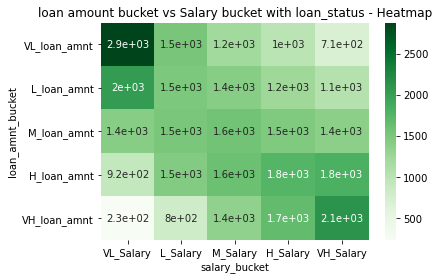

In [310]:
# creating heatmap for above pivot table to understand the relation between loan amount bucket vs Salary bucket
sns.heatmap(res1, cmap="Greens", annot=True)
plt.title('loan amount bucket vs Salary bucket with loan_status - Heatmap')
plt.show()

#### Observation

By observing above heatmap,
* Very Low salary customer gets very low loan amount and less chances of very high loan
* Very High salary customer has high chance of getting high and very high loan amount

In [311]:
# creating pivot table for funded amount amount bucket vs Salary bucket vs loan status
res2 = pd.pivot_table(data=df, index='funded_amnt_bucket', columns="salary_bucket", values='loan_status', aggfunc=np.count_nonzero)

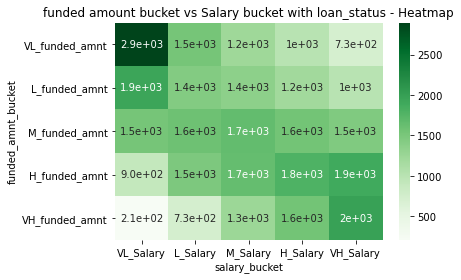

In [312]:
# creating heatmap for above pivot table to understand the relation between funded amount bucket vs Salary bucket
sns.heatmap(res2, cmap="Greens", annot=True)
plt.title('funded amount bucket vs Salary bucket with loan_status - Heatmap')
plt.show()

#### Observation

By observing above heatmap,
* Very Low salary customer gets very low funded amount and less chances of very high funded amount
* Very High salary customer has high chance of getting high and very high funded amount

In [158]:
# deriving a new column to decide whether loan is profit or not
df['business_profit'] = df.loan_status.apply(lambda x: "Profitable" if x != "Charged Off" else "Loss")

In [319]:
# checking the frequency of loss and profitable loans against grade
pd.pivot_table(data=df, index='grade', columns="business_profit", values='term', aggfunc=np.count_nonzero)

business_profit,Loss,Profitable
grade,,
A,586,8949
B,1312,9517
C,1265,6160
D,1002,3660
E,578,1702
F,228,541
G,56,109


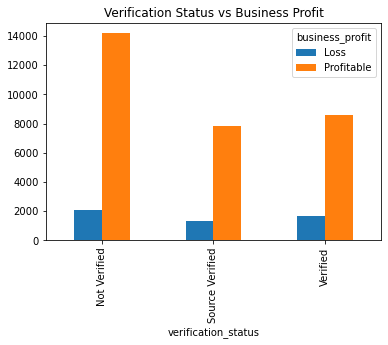

In [321]:
# plot a bar chart for verification status vs business profix
pd.pivot_table(data=df, index='verification_status', columns="business_profit", values='term', aggfunc=np.count_nonzero).plot.bar()
plt.title('Verification Status vs Business Profit')
plt.show()

#### Observation
* we can observe that Most of the profit loans are of verified (sum of Source Verified and Verified)

In [325]:
# pivot table for term vs business profit with median loan amount 
pd.pivot_table(data=df, index='term', columns="business_profit", values='loan_amnt', aggfunc=np.median)

business_profit,Loss,Profitable
term,,
36,7487.5,7800.0
60,13600.0,13200.0


#### Observation
when loan amount is 13600 which make it loss compare to 

#### Observation
* we can see that median of loss is 13600 which is higher than the Profitable loans

In [176]:
pd.pivot_table(data=df, index='term', columns="business_profit", values='funded_amnt', aggfunc=np.median)

business_profit,Loss,Profitable
term,,
36,7200,7525
60,12700,12500


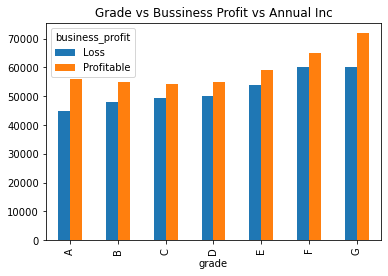

In [189]:
# Plot bar graph for grade vs business profit with annual income
pd.pivot_table(data=df, index='grade', columns="business_profit", values='annual_inc', aggfunc=np.median).plot.bar()
plt.title('Grade vs Bussiness Profit vs Annual Inc')
plt.show()

#### Observation
Now if we observe the above graph, we can see that there is a absolute dominance in profit compare to loss against the annual income, but eventhough profit is always higher compare to loss it's still Loss and Profit based on income is near values

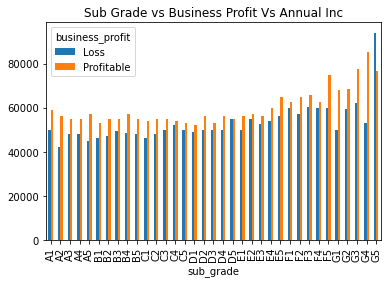

In [191]:
# Plot bar graph for sub grade vs business profit with annual income
pd.pivot_table(data=df, index='sub_grade', columns="business_profit", values='annual_inc', aggfunc=np.median).plot.bar()
plt.title('Sub Grade vs Business Profit Vs Annual Inc')
plt.show()

#### Observation
here we can see that Loss is more for Sub Grade G5 with annaul income more than 80K

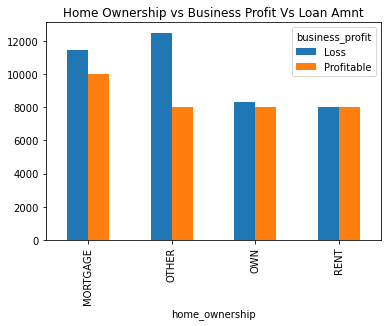

In [234]:
# Plot bar graph for home ownership vs business profit with loan amount
pd.pivot_table(data=df, index='home_ownership', columns="business_profit", values='loan_amnt', aggfunc=np.median).plot.bar()
plt.title('Home Ownership vs Business Profit Vs Loan Amnt')
plt.show()

#### Observation
* For above graph, now we can see that Loss is more than Profit when loan amount is more than 10K for Mortage and Other ownership status

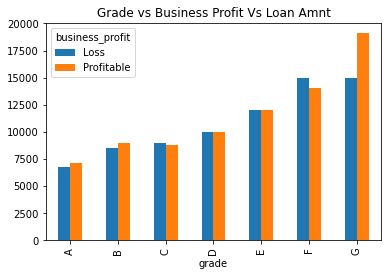

In [329]:
# Plot bar graph for grade vs business profit with funded amount
pd.pivot_table(data=df, index='grade', columns="business_profit", values='funded_amnt', aggfunc=np.median).plot.bar()
plt.title('Grade vs Business Profit Vs Loan Amnt')
plt.show()

#### observation
* We can see that Grade G has more profitable interms of median of loans funded amount
* Median of the funded amount for the loans are increases by grades from left to right

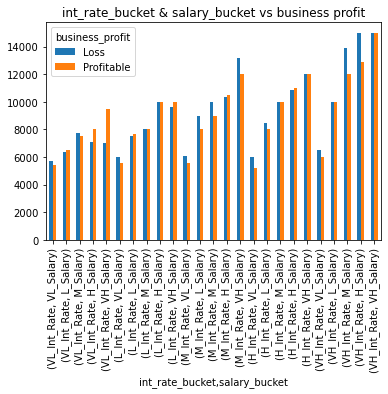

In [332]:
# bar graph for int_rate_bucket & salary_bucket vs business profit
pd.pivot_table(data=df, index=['int_rate_bucket', 'salary_bucket'], columns="business_profit", values='funded_amnt', aggfunc=np.median).plot.bar()
plt.title('int_rate_bucket & salary_bucket vs business profit')
plt.show()

#### Observation
* We can observe that Medium interest rate with Low salary, Medium salary, very high salary has the more chances of loss than profit
* Very high interest rate with medium and high salary range customers with loan amount more than 12K loan amount are tends to become defaulter

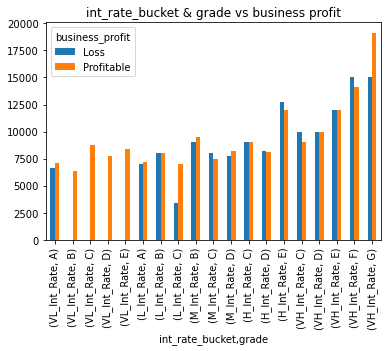

In [333]:
# bar graph for int_rate_bucket & grade vs business profit
pd.pivot_table(data=df, index=['int_rate_bucket', 'grade'], columns="business_profit", values='funded_amnt', aggfunc=np.median).plot.bar()
plt.title('int_rate_bucket & grade vs business profit')
plt.show()

#### Observation
* Now on above graph, we can clearly see there is almost zero loss for the loans with Very low interest rate for all grades except for Grade A

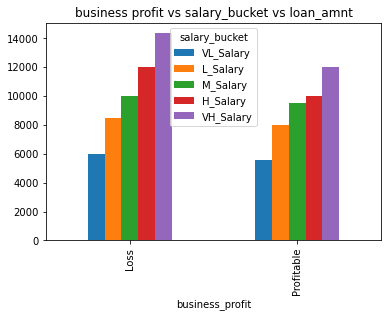

In [334]:
# bar graph for business profit vs salary_bucket vs loan_amnt
pd.pivot_table(data=df, index='business_profit', columns=['salary_bucket'], values='loan_amnt', aggfunc=np.median).plot.bar()
plt.title('business profit vs salary_bucket vs loan_amnt')
plt.show()

#### Obseravation
From above graph we can see that very high salary customer requesting 12K+ loan amount has the high change of Business Loss

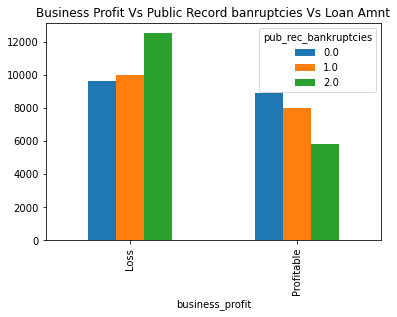

In [335]:
# bar graph for business profit vs pub_rec_bankruptcies vs loan_amnt
pd.pivot_table(data=df, index='business_profit', columns=['pub_rec_bankruptcies'], values='loan_amnt', aggfunc=np.median).plot.bar()
plt.title('Business Profit Vs Public Record banruptcies Vs Loan Amnt')
plt.show()

#### Observations
* From above graph we can see that a customer with 2 bankruptcies with loan amount more than 8k+ has more change of business loss or defaulter
* the lower the loan amount the higher the chances in profits

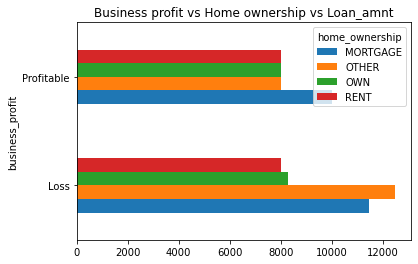

In [336]:
# bar graph for Business profit vs Home ownership vs Loan_amnt
pd.pivot_table(data=df, index='business_profit', columns=['home_ownership'], values='loan_amnt', aggfunc=np.median).plot.barh()
plt.title('Business profit vs Home ownership vs Loan_amnt')
plt.show()

#### Observation
As we already come across profit vs home ownership
* customer whos home ownership is Other (not specified any home ownership) with higher loan amount tends to become defaulter
* customers who apply's loan for more than 10K, tends to became defaulter

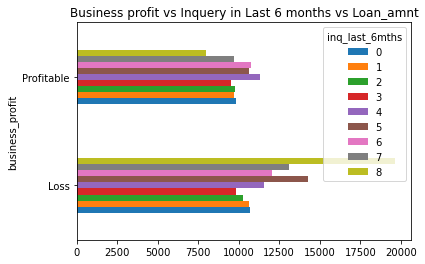

In [337]:
# bar graph for Business profit vs Inquery in Last 6 months vs Loan_amnt
pd.pivot_table(data=df, index='business_profit', columns=['inq_last_6mths'], values='loan_amnt', aggfunc=np.mean).plot.barh()
plt.title('Business profit vs Inquery in Last 6 months vs Loan_amnt')
plt.show()

#### Observation
* We can observe that customer with 8 inqueries in last 6 months has high chance of become defaulter, and the chance of becoming defaulter increases by higher loan amount
* another thing we can observer that customer with more than 5 inqueries in last 6 months has more chances of becoming defaulter

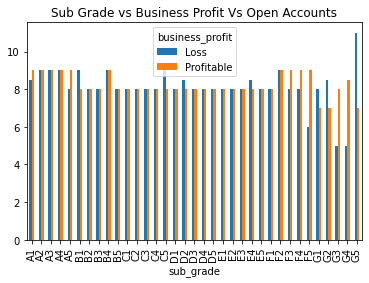

In [339]:
# bar graph for Sub Grade vs Business profit vs open accounts
pd.pivot_table(data=df, index='sub_grade', columns="business_profit", values='open_acc', aggfunc=np.median).plot.bar()
plt.title('Sub Grade vs Business Profit Vs Open Accounts')
plt.show()

#### Observation
Based on obve graph we can observe that Customer with more than 8 account with Sub Grade G5, has more chance of becoming a Loss i.e. Defaulter

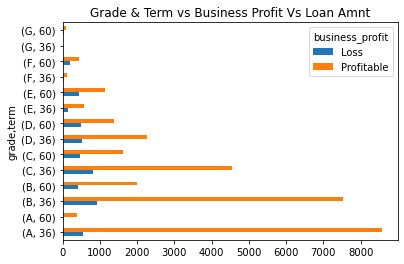

In [340]:
# bar graph for Grade & Term vs Business profit vs Loan_amnt
pd.pivot_table(data=df, index=['grade', 'term'], columns=['business_profit'], values='loan_amnt', aggfunc=np.count_nonzero).plot.barh()
plt.title('Grade & Term vs Business Profit Vs Loan Amnt')
plt.show()

#### Observation

* From above plot we can see that Customer with A grade and 60 month term period loan has negligible loss and we can consider it as profit without loss
* Same for customer with G grade with 60 months term & F Grade with 36 month term has negligible loss

# Multivariate Analysis

After Bi Variate Analysis we can also work on multivariate analysis to get understanding how more than two variables behave under correlation with each other.

Firstly we are using pair plot where diagnol subplot represent univariate analysis of each entity taken into consideration.

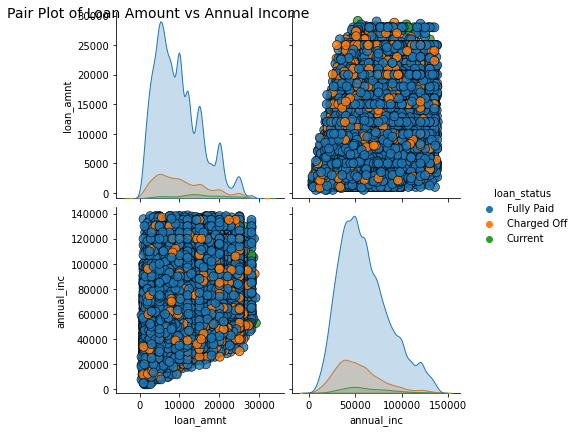

In [342]:
sns.pairplot(df, 
             vars = ['loan_amnt', 'annual_inc'], 
             hue = 'loan_status', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.8, 's': 80, 'edgecolor': 'k'},
             size = 3);
# Title 
#plt.suptitle('Pair Plot of Loan Amount vs Annual Income\n\n\n', ha='right',
             #size = 15);

plt.suptitle("\n".join(["Pair Plot of Loan Amount vs Annual Income"]), y=0.99, ha='right', size=14)
plt.show()

#### Observations of Loan Amount vs Annual Income
- It is observed here that many bank clients are still repaying loan
- Those clients who have taken highest loan amount have fully paid, secondly those clients who come inbetween currently
  paying and fully paid are the ones who are charged off and then they have taken second highest loan amount.
- Those employees who have fully paid initially have taken high loan amount which gradually decreases

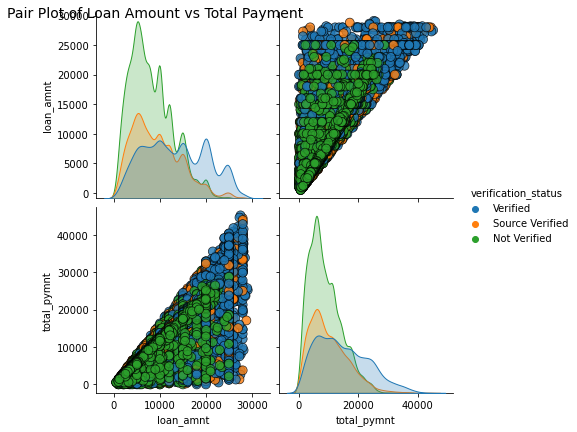

In [343]:
sns.pairplot(df, 
             vars = ['loan_amnt', 'total_pymnt'], 
             hue = 'verification_status', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.8, 's': 80, 'edgecolor': 'k'},
             size = 3);


plt.suptitle("\n".join(["Pair Plot of Loan Amount vs Total Payment"]), y=0.99, ha='right', size=14)
plt.show()
                

#### Observations 
- It is observed here that many bank clients verification status holds as not verified who have taken highest loan amount.
- Only minimal number of people verification status is verified who have not taken huge loan amount.

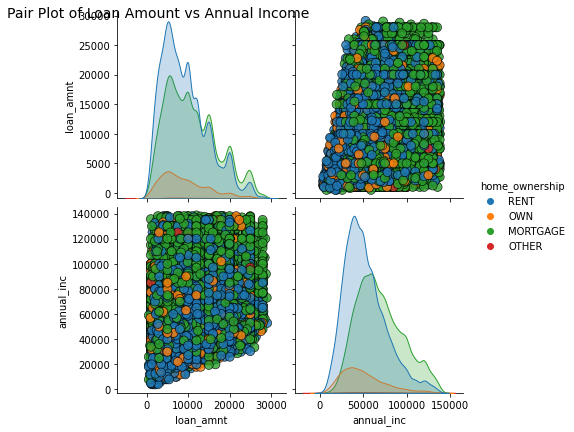

In [344]:
sns.pairplot(df, 
             vars = ['loan_amnt', 'annual_inc'], 
             hue = 'home_ownership', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.8, 's': 80, 'edgecolor': 'k'},
             size = 3);


plt.suptitle("\n".join(["Pair Plot of Loan Amount vs Annual Income"]), y=0.99, ha='right', size=14)
plt.show()
             

#### Observations 
- Here we observe that many bank clients who are living in rented house have taken high loan amount.
- People who live in mortage and other are more.